# Flood susceptibility

In [230]:
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

r_seed = 99
np.random.seed(r_seed)
random.seed(r_seed)

%matplotlib inline

In [231]:
data_url = r'./data/Data.xlsx'
data_egypt = pd.read_excel(data_url, sheet_name='Egypt')
data_vietnam = pd.read_excel(data_url, sheet_name='Vietnam')
data_algeria = pd.read_excel(data_url, sheet_name='Algeria')

### Data Insights

In [232]:
DATA = data_vietnam

print(f'{DATA.shape[0]}x{DATA.shape[1]}')
# print(DATA.info())
DATA.head()

1675x13


,Flood,Aspect,Rainfall,CurvPlan,DEM,NDVI,FlowAccum,FlodDistH,FlodDistV,Hillshade,Slope,SPI,TWI
0,0,273.673553,5394,-1.181288,1262.251709,6764,3,1997.939575,517.424927,225,39.400539,73.926514,4.983013
1,0,87.612595,6959,0.198808,30.803158,4854,0,664.264038,23.386223,176,1.799770,0.000000,6.830124
2,0,145.130341,6924,1.576899,63.163097,6376,0,2055.807617,60.674355,89,24.735586,0.000000,4.174054
3,0,305.356903,6994,0.439474,30.838863,5035,0,4933.160156,21.388062,185,1.614745,0.000000,6.935140
4,0,211.153061,6970,-3.486925,557.386658,7271,7,30.000000,0.345276,156,19.218348,73.203819,6.531634


In [233]:
DATA.describe()

,Flood,Aspect,Rainfall,CurvPlan,DEM,NDVI,FlowAccum,FlodDistH,FlodDistV,Hillshade,Slope,SPI,TWI
count,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000
mean,0.493731,173.909603,6629.604776,0.125585,298.884694,5488.811940,68.156418,2382.938856,179.304976,174.817313,9.654919,133.546706,7.473611
std,0.500110,108.644832,376.502427,0.855580,432.444774,1939.130588,1326.725104,2003.148568,254.379430,33.365219,11.522211,2922.939273,2.483840
min,0.000000,-1.000000,5155.000000,-5.247857,-3.016160,-2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.505941
25%,0.000000,77.966953,6455.000000,-0.050069,4.537584,4001.000000,0.000000,816.837585,1.740580,175.000000,0.427123,0.000000,5.425692
50%,0.000000,172.470657,6770.000000,0.008038,20.827703,5018.000000,1.000000,1839.777588,12.356081,180.000000,2.486717,0.174097,7.283823
75%,1.000000,270.082687,6876.000000,0.284697,548.668823,7377.500000,3.000000,3504.153442,325.367874,183.000000,18.474319,13.125132,8.896593
max,1.000000,359.989441,7417.000000,4.279504,2331.024170,9837.000000,49301.000000,11105.732422,1471.843262,254.000000,49.899712,117852.890620,19.250879


### Data Normalization

In [234]:
from sklearn.preprocessing import Normalizer
Nr = Normalizer()

DATA_N = DATA.drop('Flood', axis=1)
DATA_N = Nr.fit_transform(DATA_N)
DATA_N = pd.DataFrame(DATA_N, columns=DATA.columns[1:])

DATA_N['Flood'] = DATA['Flood']
DATA_N.head()

,Aspect,Rainfall,CurvPlan,DEM,NDVI,FlowAccum,FlodDistH,FlodDistV,Hillshade,Slope,SPI,TWI,Flood
0,0.030440,0.599955,-0.000131,0.140396,0.752335,0.000334,0.222223,0.057551,0.025026,0.004382,0.008223,0.000554,0
1,0.010292,0.817460,0.000023,0.003618,0.570190,0.000000,0.078030,0.002747,0.020674,0.000211,0.000000,0.000802,0
2,0.015061,0.718531,0.000164,0.006555,0.661663,0.000000,0.213339,0.006296,0.009236,0.002567,0.000000,0.000433,0
3,0.030731,0.703876,0.000044,0.003104,0.506722,0.000000,0.496473,0.002152,0.018618,0.000163,0.000000,0.000698,0
4,0.020924,0.690693,-0.000346,0.055234,0.720520,0.000694,0.002973,0.000034,0.015459,0.001904,0.007254,0.000647,0


### Dimension Reduction with PCA

<AxesSubplot:>

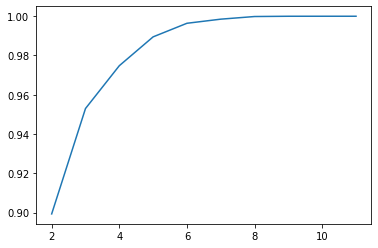

In [235]:
from sklearn.decomposition import PCA

DATA_PCA = DATA_N.drop('Flood', axis=1)

variance_ratio = {}
for n in range(2, DATA_PCA.shape[1]):
    pca = PCA(n_components=n)
    cr_pca = pca.fit(DATA_PCA)
    variance_ratio[n] = sum(cr_pca.explained_variance_ratio_)

pd.Series(variance_ratio).plot()

In [236]:
pca = PCA(n_components=6)
DATA_R = pca.fit_transform(DATA_PCA)
DATA_R = pd.DataFrame(
  DATA_R,
  columns=[f'PC-{i+1}' for i in range(DATA_R.shape[1])]
)
DATA_R['Flood'] = DATA['Flood']

print(f'{DATA_R.shape[0]}x{DATA_R.shape[1]}')
DATA_R.head()

1675x7


,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,Flood
0,0.128186,-0.194191,0.031140,0.083276,-0.000253,-0.021924,0
1,-0.176352,-0.053286,-0.008484,-0.005319,-0.001420,0.003022,0
2,0.009775,-0.083433,-0.028501,-0.028197,-0.002434,-0.001614,0
3,0.187748,0.185632,-0.037559,-0.040133,-0.002522,-0.000167,0
4,-0.113298,-0.252657,0.032742,0.020072,0.004133,0.021745,0


### Splitting Positive and Negative classes

In [246]:
[(_, DATA_NEG), (_, DATA_POS)] = DATA_R.groupby('Flood')

DATA_POS, DATA_NEG = pd.DataFrame(DATA_POS), pd.DataFrame(DATA_NEG)

DATA_NEG_X = DATA_NEG.drop('Flood', axis=1)
DATA_NEG_Y = DATA_NEG['Flood']

DATA_POS_X = DATA_POS.drop('Flood', axis=1)
DATA_POS_Y = DATA_POS['Flood']

### Decomposition of Positive Class

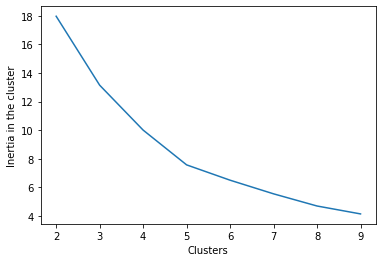

In [238]:
from sklearn.cluster import KMeans

inertia = []
k_range = range(2, 10)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(DATA_POS_X)
    inertia.append(km.inertia_)

plt.plot(k_range, inertia)
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.show()

In [239]:
KM = KMeans(n_clusters=2, random_state=r_seed)
KM.fit(DATA_POS_X)

DATA_POS_Y = pd.Series(KM.labels_).apply(lambda x: x + 1)
DATA_POS_Y.describe()

count    827.000000
mean       1.221282
std        0.415361
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
dtype: float64

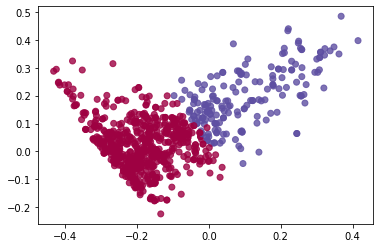

In [240]:
plt.scatter(DATA_POS_X['PC-1'], DATA_POS_X['PC-2'],
            c=DATA_POS_Y, cmap="Spectral", alpha=0.8)
plt.show()

### Reconstructing Dataset

In [245]:
# Y = pd.concat([DATA_NEG_Y, DATA_POS_Y])

# DATA_POS_X['Flood'] = DATA_POS_Y
# DATA_NEG_X['Flood'] = DATA_NEG_Y

print(DATA_NEG_Y.head(10))
print(DATA_NEG_Y.tail(10))

print(DATA_POS_Y.head(10))
print(DATA_POS_Y.tail(10))


0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Flood, dtype: int64
1473    0
1474    0
1475    0
1476    0
1477    0
1478    0
1479    0
1480    0
1481    0
1482    0
Name: Flood, dtype: int64
0    1
1    1
2    1
3    2
4    1
5    1
6    1
7    1
8    1
9    2
dtype: int64
817    2
818    1
819    1
820    2
821    1
822    1
823    1
824    2
825    1
826    1
dtype: int64
